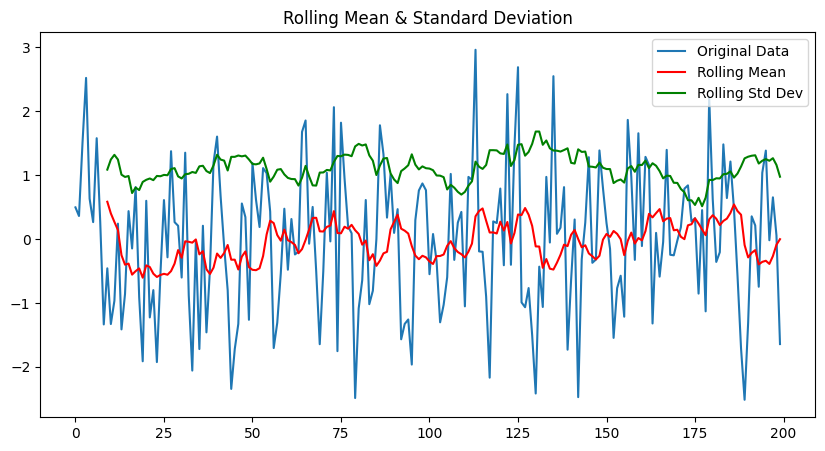

Augmented Dickey-Fuller (ADF) Test Results:
Test Statistic: -3.1530
p-value: 0.0229
Threshold Values: {'1%': -3.465811691080702, '5%': -2.877123351472649, '10%': -2.5750770662586864}
Inference: The given time series is stationary.

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test Results:
Test Statistic: 0.0786
p-value: 0.1000
Threshold Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Inference: The given time series is stationary.



<ipython-input-3-9509b62290f8>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags='auto')


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

def generate_seasonal_data(n=100, seed=42, period=12, amplitude=1):
    np.random.seed(seed)
    time = np.arange(n)
    seasonal_component = amplitude * np.sin(2 * np.pi * time / period)
    return np.random.randn(n) + seasonal_component

def adf_test(series):
    result = adfuller(series)
    print("Augmented Dickey-Fuller (ADF) Test Results:")
    print(f"Test Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Threshold Values:", result[4])
    if result[1] < 0.05:
        print("Inference: The given time series is stationary.\n")
    else:
        print("Inference: The given time series is not stationary.\n")

def kpss_test(series):
    result = kpss(series, regression='c', nlags='auto')
    print("Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test Results:")
    print(f"Test Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Threshold Values:", result[3])
    if result[1] < 0.05:
        print("Inference: The given time series is not stationary.\n")
    else:
        print("Inference: The given time series is stationary.\n")

def plot_rolling_statistics(series, window=10):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    plt.figure(figsize=(10,5))
    plt.plot(series, label="Original Data")
    plt.plot(rolling_mean, label="Rolling Mean", color='red')
    plt.plot(rolling_std, label="Rolling Std Dev", color='green')
    plt.legend()
    plt.title("Rolling Mean & Standard Deviation")
    plt.show()

if __name__ == "__main__":
    data = generate_seasonal_data(200)
    df = pd.Series(data)

    plot_rolling_statistics(df)
    adf_test(df)
    kpss_test(df)


Before differencing:
ADF Statistic: -4.0182
P-Value: 0.0013
Inference: Stationary series

After differencing:
ADF Statistic: -2.0792
P-Value: 0.2529
Inference: Non-stationary series


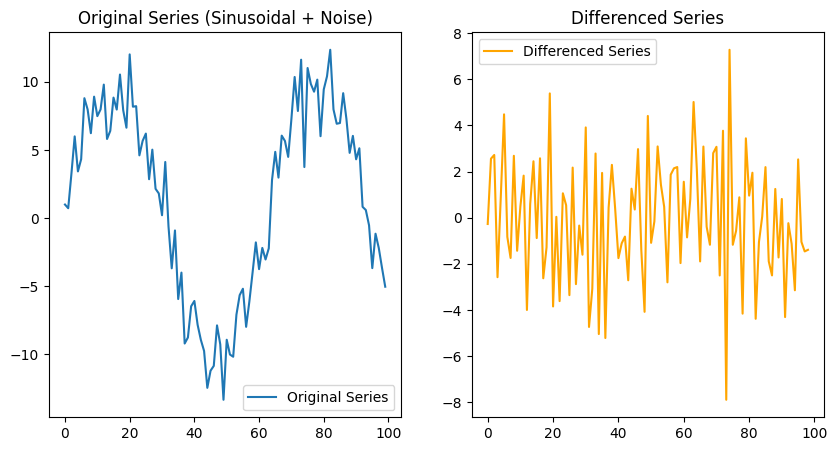

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


np.random.seed(42)
n = 100
time = np.arange(n)
trend = np.sin(0.1 * time) * 10
noise = np.random.randn(n) * 2
series = trend + noise


diff_series = np.diff(series)

def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"P-Value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("Inference: Stationary series")
    else:
        print("Inference: Non-stationary series")

print("Before differencing:")
adf_test(series)

print("\nAfter differencing:")
adf_test(diff_series)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(series, label="Original Series")
plt.legend()
plt.title("Original Series (Sinusoidal + Noise)")

plt.subplot(1, 2, 2)
plt.plot(diff_series, label="Differenced Series", color='orange')
plt.legend()
plt.title("Differenced Series")

plt.show()


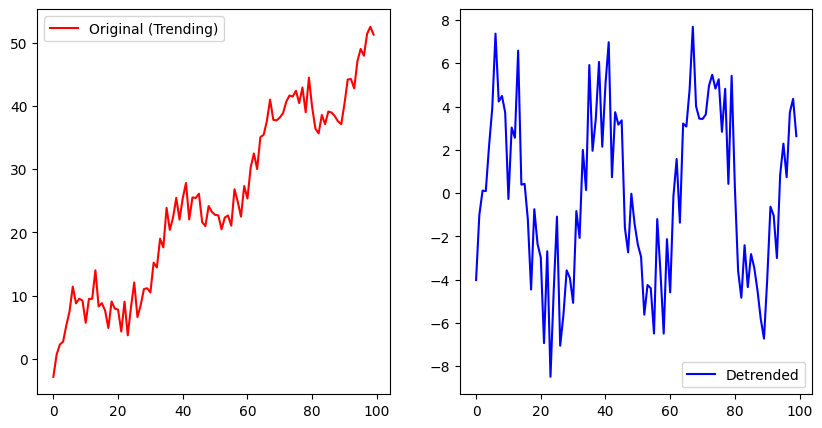


After detrending:
ADF Statistic: -5.2792
P-Value: 0.0000
Inference: Stationary series


In [7]:
from scipy.stats import linregress

time = np.arange(n)
trend_series = 0.5 * time + np.sin(0.2 * time) * 5 + np.random.randn(n) * 2


slope, intercept, _, _, _ = linregress(time, trend_series)
trend = slope * time + intercept


detrended_series = trend_series - trend

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(trend_series, label="Original (Trending)", color='red')
plt.legend()

plt.subplot(1,2,2)
plt.plot(detrended_series, label="Detrended", color='blue')
plt.legend()
plt.show()

print("\nAfter detrending:")
adf_test(detrended_series)
